In [1]:
import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.width', None)

In [33]:
# import os

# def print_tree(root_dir):
#     for root, dirs, files in os.walk(root_dir):
#         level = root.replace(root_dir, "").count(os.sep)
#         indent = " " * 4 * level
#         print(f"{indent}📁 {os.path.basename(root)}/")

#         subindent = " " * 4 * (level + 1)
#         for f in files:
#             print(f"{subindent}📄 {f}")

# # Ví dụ
# print_tree(r"C:\Users\Phong\Desktop\GIS\Project 2\Surface Geology of Australia 11M (2012)\mapinfo")


In [2]:
import os

def print_tree(root_dir):
    for root, dirs, files in os.walk(root_dir):
        level = root.replace(root_dir, "").count(os.sep)
        indent = " " * 4 * level
        print(f"{indent}📁 {os.path.basename(root)}/")

        subindent = " " * 4 * (level + 1)
        for f in files:
            print(f"{subindent}📄 {f}")

# Ví dụ
print_tree(r"C:\Users\Phong\Desktop\GIS\Project 2\Surface Geology of Australia 11M (2012)\shapefiles")


📁 shapefiles/
    📄 Contacts 1M.lyr
    📄 Contacts1M.dbf
    📄 Contacts1M.prj
    📄 Contacts1M.sbn
    📄 Contacts1M.sbx
    📄 Contacts1M.shp
    📄 Contacts1M.shp.xml
    📄 Contacts1M.shx
    📄 Event1M.dbf
    📄 Event1M.dbf.xml
    📄 Faults and Shears 1M.lyr
    📄 Framework 1M.lyr
    📄 Framework1M.dbf
    📄 Framework1M.prj
    📄 Framework1M.sbn
    📄 Framework1M.sbx
    📄 Framework1M.shp
    📄 Framework1M.shp.xml
    📄 Framework1M.shx
    📄 Geological Units 1M - Lines.lyr
    📄 Geological Units 1M - Polygons.lyr
    📄 GeologicUnit1M.dbf
    📄 GeologicUnit1M.dbf.xml
    📄 GeologicUnitLines1M.dbf
    📄 GeologicUnitLines1M.prj
    📄 GeologicUnitLines1M.shp
    📄 GeologicUnitLines1M.shp.xml
    📄 GeologicUnitLines1M.shx
    📄 GeologicUnitPolygons1M.dbf
    📄 GeologicUnitPolygons1M.prj
    📄 GeologicUnitPolygons1M.shp
    📄 GeologicUnitPolygons1M.shp.xml
    📄 GeologicUnitPolygons1M.shx
    📄 Lithologies1M.dbf
    📄 Lithologies1M.dbf.xml
    📄 Miscellaneous Lines 1M.lyr
    📄 MiscLines1M.db

In [3]:
import os

workdir = r"C:\Users\Phong\Desktop\GIS\Project 2\Surface Geology of Australia 11M (2012)\shapefiles"
os.chdir(workdir)

print(os.getcwd())

C:\Users\Phong\Desktop\GIS\Project 2\Surface Geology of Australia 11M (2012)\shapefiles


In [4]:
# os.chdir(os.path.expanduser("~"))
# print(os.getcwd())

In [5]:
import geopandas as gpd
from pathlib import Path

BASE = Path(r"C:\Users\Phong\Desktop\GIS\Project 2\Surface Geology of Australia 11M (2012)\shapefiles")

geol = gpd.read_file(BASE / "GeologicUnitPolygons1M.shp")
faults = gpd.read_file(BASE / "ShearDisplacementLines1M.shp")
contacts = gpd.read_file(BASE / "Contacts1M.shp")

In [6]:
print(geol.crs)

EPSG:4283


In [7]:
geol = geol.to_crs("EPSG:28353")     # GDA94 / MGA zone 53 (NT)
faults = faults.to_crs("EPSG:28353")
contacts = contacts.to_crs("EPSG:28353")

Text(0.5, 1.0, 'DEM Tile Grid (1° x 1°)')

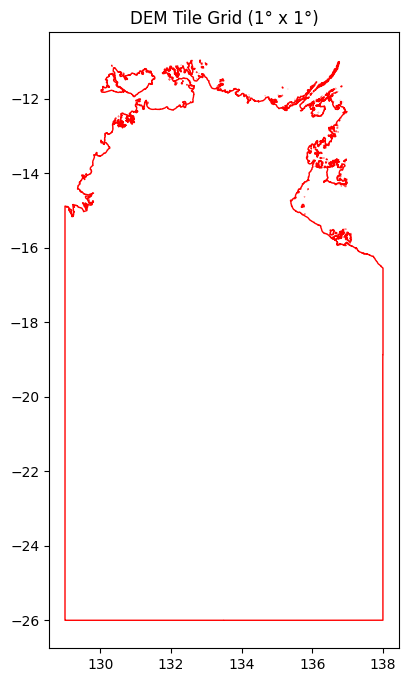

In [8]:
tile_index_path = r"C:\Users\Phong\Desktop\GIS\Project 2\nov25_adminbounds_gda_94_shp\NOV25_AdminBounds_GDA_94_SHP\StateBoundaries_AUG20_ALLSTATES_GDA94_SHP_100\State Boundaries\State Boundaries AUGUST 2020\Standard\NT_STATE_POLYGON_shp.shp"

gdf = gpd.read_file(tile_index_path)
ax = gdf.plot(
    figsize=(8, 8),
    facecolor="none",
    edgecolor="red",
    linewidth=1
)

ax.set_title("DEM Tile Grid (1° x 1°)")

In [9]:
# "C:\Users\Phong\Desktop\GIS\Project 2\Surface Geology of Australia 11M (2012)\NT_STATE_POLYGON_shp.shp"

In [10]:
nt = gpd.read_file(r"C:\Users\Phong\Desktop\GIS\Project 2\nov25_adminbounds_gda_94_shp\NOV25_AdminBounds_GDA_94_SHP\StateBoundaries_AUG20_ALLSTATES_GDA94_SHP_100\State Boundaries\State Boundaries AUGUST 2020\Standard\NT_STATE_POLYGON_shp.shp").to_crs("EPSG:28353")
nt_buf = nt.buffer(20000)  # 20 km buffer

geol_nt = gpd.clip(geol, nt_buf)
faults_nt = gpd.clip(faults, nt_buf)
contacts_nt = gpd.clip(contacts, nt_buf)

In [11]:
# geol_nt

In [12]:
geol_nt.columns

Index(['GEODB_OID', 'OBJECTID', 'MAPSYMBOL', 'PLOTSYMBOL', 'STRATNO', 'NAME',
       'DESCR', 'TYPENAME', 'TYPE_URI', 'GEOLHIST', 'REPAGE_URI', 'YNGAGE_URI',
       'OLDAGE_URI', 'LITHOLOGY', 'REPLTH_URI', 'MORPHOLOGY', 'OBSMETHOD',
       'CONFIDENCE', 'SOURCE', 'METADATA', 'FRAME', 'RESSCALE', 'CAPTDATE',
       'MODDATE', 'PLOTRANK', 'FEATUREID', 'GEOLUNITID', 'SHAPE_LENG',
       'SHAPE_AREA', 'geometry'],
      dtype='object')

In [13]:
geol_nt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 48631 entries, 144539 to 180128
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   GEODB_OID   0 non-null      float64       
 1   OBJECTID    48631 non-null  int64         
 2   MAPSYMBOL   48631 non-null  object        
 3   PLOTSYMBOL  48631 non-null  object        
 4   STRATNO     48631 non-null  int64         
 5   NAME        48631 non-null  object        
 6   DESCR       48631 non-null  object        
 7   TYPENAME    48631 non-null  object        
 8   TYPE_URI    48631 non-null  object        
 9   GEOLHIST    48631 non-null  object        
 10  REPAGE_URI  48631 non-null  object        
 11  YNGAGE_URI  48631 non-null  object        
 12  OLDAGE_URI  48631 non-null  object        
 13  LITHOLOGY   48631 non-null  object        
 14  REPLTH_URI  48631 non-null  object        
 15  MORPHOLOGY  4387 non-null   object        
 16  OBSMETHOD   4

In [14]:
geol_nt.is_valid.value_counts()

True    48631
Name: count, dtype: int64

In [15]:
contacts_nt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 105564 entries, 258713 to 559737
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   TYPENAME    105371 non-null  object        
 1   TYPE_URI    105371 non-null  object        
 2   CNTCTNAME   0 non-null       object        
 3   DESCR       105564 non-null  object        
 4   EXPOSURE    105564 non-null  object        
 5   OBSMETHOD   105564 non-null  object        
 6   CONFIDENCE  0 non-null       object        
 7   POSACC_M    105564 non-null  int64         
 8   SOURCE      105564 non-null  object        
 9   METADATA    105564 non-null  object        
 10  FRAME       105564 non-null  object        
 11  RESSCALE    105564 non-null  int64         
 12  CAPTSCALE   105564 non-null  int64         
 13  CAPTDATE    105564 non-null  datetime64[ms]
 14  MODDATE     105564 non-null  datetime64[ms]
 15  PLOTRANK    105564 non-null  int32         

In [16]:
contacts_nt.is_valid.value_counts()


True    105564
Name: count, dtype: int64

In [17]:
faults_nt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 24116 entries, 100025 to 100982
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TYPENAME    24116 non-null  object        
 1   TYPE_URI    24116 non-null  object        
 2   FLTNAME     66 non-null     object        
 3   DESCR       24116 non-null  object        
 4   EXPOSURE    24116 non-null  object        
 5   FAULTFILL   24116 non-null  object        
 6   DEFRMSTYLE  24116 non-null  object        
 7   DEFRM_URI   24116 non-null  object        
 8   MVTTYPE     0 non-null      object        
 9   MVTTYP_URI  24116 non-null  object        
 10  MVTSENSE    0 non-null      object        
 11  DSPLCMNT    0 non-null      object        
 12  DIP         24116 non-null  int32         
 13  DIPDIRN     24116 non-null  int32         
 14  WIDTH       24116 non-null  int64         
 15  GEOLHIST    0 non-null      object        
 16  REPAGE_URI  2

In [18]:
faults_nt.is_valid.value_counts()

True    24116
Name: count, dtype: int64

In [19]:
faults_nt.is_valid

100025    True
82732     True
4619      True
4618      True
4795      True
          ... 
100978    True
100979    True
100980    True
100981    True
100982    True
Length: 24116, dtype: bool

In [20]:
geol_nt["LITHOLOGY"].value_counts().head(15)

LITHOLOGY
regolith                                                                    17572
sedimentary siliciclastic                                                   14569
igneous felsic intrusive                                                     3071
sedimentary carbonate                                                        2909
metasedimentary siliciclastic                                                1833
high grade metamorphic rock                                                  1762
sedimentary siliciclastic; sedimentary carbonate                             1205
igneous mafic volcanic                                                        987
igneous mafic intrusive                                                       815
sedimentary carbonate; sedimentary siliciclastic                              590
sedimentary carbonate; sedimentary non-carbonate chemical or biochemical      546
igneous felsic volcanic                                                       361
igneou

In [21]:
geol_nt["LITHOLOGY"].value_counts()

LITHOLOGY
regolith                                                                        17572
sedimentary siliciclastic                                                       14569
igneous felsic intrusive                                                         3071
sedimentary carbonate                                                            2909
metasedimentary siliciclastic                                                    1833
                                                                                ...  
igneous carbonatite                                                                 1
alkaline ultrabasic                                                                 1
igneous volcanic; igneous felsic intrusive                                          1
sedimentary siliciclastic; sedimentary non-carbonate chemical or biochemical        1
igneous felsic volcanic; igneous felsic intrusive                                   1
Name: count, Length: 80, dtype: int64

In [22]:
geol_nt = geol_nt[geol_nt.is_valid]
faults_nt = faults_nt[faults_nt.is_valid]
contacts_nt = contacts_nt[contacts_nt.is_valid]

## FEATURE ENGINEERING (VECTOR)

In [23]:
import os, json
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.transform import from_origin
from rasterio.features import rasterize

# Nếu chưa có scipy:
# pip install scipy
from scipy.ndimage import distance_transform_edt


In [24]:
def split_litho(s):
    if s is None:
        return []
    return [x.strip().lower() for x in str(s).split(";")]
    
geol_nt["litho_list"] = geol_nt["LITHOLOGY"].apply(split_litho)


In [25]:
geol_nt["litho_list"]

144539                                           [regolith]
15153                                            [regolith]
230218    [igneous mafic intrusive, high grade metamorph...
164338    [igneous mafic intrusive, igneous ultramafic i...
21011                                            [regolith]
                                ...                        
18323                                            [regolith]
193009                                           [regolith]
204150                          [sedimentary siliciclastic]
79266                           [sedimentary siliciclastic]
180128                                           [regolith]
Name: litho_list, Length: 48631, dtype: object

In [26]:
def litho_to_group(s):
    if "regolith" in s:
        return "regolith"
    if "sedimentary siliciclastic" in s:
        return "sed_siliciclastic"
    if "sedimentary carbonate" in s:
        return "sed_carbonate"
    if "felsic intrusive" in s:
        return "igneous_felsic_intrusive"
    if "mafic volcanic" in s:
        return "igneous_mafic_volcanic"
    if "mafic intrusive" in s:
        return "igneous_mafic_intrusive"
    if "felsic volcanic" in s:
        return "igneous_felsic_volcanic"
    if "metasedimentary" in s:
        return "metasedimentary"
    if "metamorphic" in s:
        return "metamorphic"
    return None

geol_nt["litho_groups"] = geol_nt["litho_list"].apply(
    lambda xs: sorted(set(filter(None, (litho_to_group(x) for x in xs))))
)


In [27]:
all_groups = sorted({g for xs in geol_nt["litho_groups"] for g in xs})

for g in all_groups:
    geol_nt[f"litho_{g}"] = geol_nt["litho_groups"].apply(lambda xs: int(g in xs))


In [28]:
all_groups

['igneous_felsic_intrusive',
 'igneous_felsic_volcanic',
 'igneous_mafic_intrusive',
 'igneous_mafic_volcanic',
 'metamorphic',
 'metasedimentary',
 'regolith',
 'sed_carbonate',
 'sed_siliciclastic']

In [31]:
geol_nt.iloc[0]

GEODB_OID                                                                       NaN
OBJECTID                                                                     144540
MAPSYMBOL                                                                       Czs
PLOTSYMBOL                                                                      Czs
STRATNO                                                                       38499
NAME                                                               sand plain 38499
DESCR                             Sand or gravel plains; may include some residu...
TYPENAME                                                    lithostratigraphic unit
TYPE_URI                          http://resource.geosciml.org/classifier/cgi/ge...
GEOLHIST                                                                   Cenozoic
REPAGE_URI                        http://resource.geosciml.org/classifier/ics/is...
YNGAGE_URI                        http://resource.geosciml.org/classifier/ic

In [37]:
geol_nt["GEOLHIST"].value_counts().head(30)

GEOLHIST
Cenozoic                               7591
Quaternary                             6180
Statherian                             4028
Orosirian                              3574
Holocene                               2806
Mesoproterozoic                        1767
Cretaceous                             1761
Calymmian                              1703
Paleoproterozoic                       1650
Neoproterozoic                         1615
Middle Cambrian                        1551
Orosirian to Statherian                1410
Cenozoic to Quaternary                 1391
Cryogenian                             1265
Calymmian to Ectasian                   841
Early Cambrian to Middle Cambrian       629
Late Cambrian to Ordovician             470
Statherian to Calymmian                 469
Early Cambrian                          395
Boomerangian to Mindyallan              340
Cambrian                                311
Middle Miocene                          310
Silurian to Middle Devo

In [38]:
import pandas as pd
import numpy as np

geol_nt["geolhist_norm"] = (
    geol_nt["GEOLHIST"]
    .astype(str)
    .str.strip()
    .str.lower()
)


In [ ]:
# ENCODE AGE EON

In [42]:
def age_eon(text):
    if any(k in text for k in ["archaean", "archean"]):
        return "Archean"
    if any(k in text for k in [
        "paleoproterozoic", "mesoproterozoic", "neoproterozoic",
        "statherian", "orosirian", "calymmian", "ectasian",
        "cryogenian", "tonian", "proterozoic"
    ]):
        return "Proterozoic"
    if any(k in text for k in [
        "cambrian", "ordovician", "silurian", "devonian",
        "carboniferous", "permian", "triassic",
        "jurassic", "cretaceous",
        "paleogene", "neogene", "quaternary",
        "cenozoic", "holocene", "eocene", "miocene"
    ]):
        return "Phanerozoic"
    return "Unknown"

geol_nt["age_eon"] = geol_nt["geolhist_norm"].apply(age_eon)
geol_nt["age_eon_code"] = geol_nt["age_eon"].astype("category").cat.codes


In [45]:
geol_nt["age_eon_code"] 

144539    1
15153     1
230218    3
164338    3
21011     1
         ..
18323     1
193009    1
204150    3
79266     3
180128    1
Name: age_eon_code, Length: 48631, dtype: int8